In [55]:
import matplotlib
import pystac_client
from pystac_client import Client
import matplotlib.pyplot as plt
import numpy as np


### Print package versions

In [56]:
print("Numpy version", np.__version__)
print("Matplotlib version", matplotlib.__version__)
print("Pystac client version",pystac_client.__version__)


Numpy version 1.24.3
Matplotlib version 3.7.1
Pystac client version 0.7.1


### Connect to API using pystac client

In [57]:
api_url = "https://earth-search.aws.element84.com/v1"
client = Client.open(api_url)


### Get the title of different collections available

In [58]:
collections = client.get_collections()
for collection in collections:
    print(collection.title)

Copernicus DEM GLO-30
NAIP: National Agriculture Imagery Program
Sentinel-2 Level 2A
Sentinel-2 Level 1C
Landsat Collection 2 Level-2
Copernicus DEM GLO-90
Sentinel-1 Level 1C Ground Range Detected (GRD)


### Create a point using latitude and longitude values

In [59]:
point = dict(type="Point", coordinates=(11.232754, 35.004162))

### Get sentinel2 collection that intersect with a given point for a given range of dates

In [60]:
search_results = client.search(
    collections=["sentinel-2-l2a"],
    intersects=point,
    datetime="2022-01-01/2022-05-31"
)

In [61]:
items = search_results.item_collection()
len(items)

60

### Get water percentage value for each item in the collection

In [62]:
water_percent=[]
for item in items:
    water_percent.append(item.properties["s2:water_percentage"])

### Create a histogram to depict the distribution of values using numpy and matplotlib

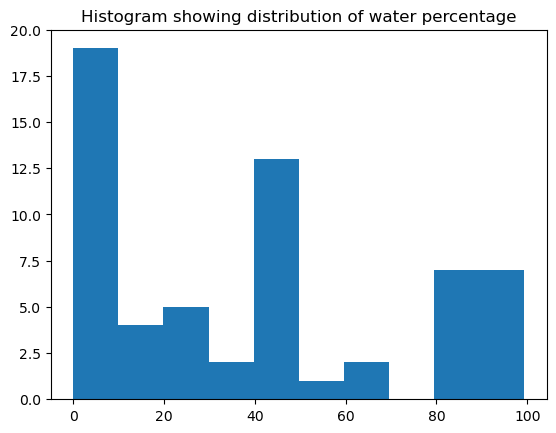

In [63]:
counts, bins = np.histogram(water_percent)
plt.hist(bins[:-1], bins, weights=counts)
plt.ylim(0, 20)
plt.title('Histogram showing distribution of water percentage')
plt.show()

### Filter the collection of items based on cloud cover and water percentage

In [64]:
filtered_items = list(filter(lambda x: x.properties["eo:cloud_cover"] < 5 and x.properties["s2:water_percentage"] > 50, items))

In [65]:
for i in filtered_items:
    print(i.id)

S2B_32SQD_20220410_0_L2A
S2B_32SQD_20220331_0_L2A
S2B_32SQD_20220209_0_L2A
S2A_32SQD_20220204_0_L2A
S2B_32SQD_20220130_0_L2A
S2B_32SQD_20220120_0_L2A
S2A_32SQD_20220105_0_L2A
